# SMOTE Demo

In [1]:
import pandas as pd
from smote.over_sampling import SMOTE


In [2]:
data = pd.read_csv("KC1.csv")
data

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,class
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1.0,1.0,1.0,1.0,1.0,True
2,83.0,11.0,1.0,11.0,171.0,927.89,0.04,23.04,40.27,21378.61,...,65,10,6,0,18.0,25.0,107.0,64.0,21.0,True
3,46.0,8.0,6.0,8.0,141.0,769.78,0.07,14.86,51.81,11436.73,...,37,2,5,0,16.0,28.0,89.0,52.0,15.0,True
4,25.0,3.0,1.0,3.0,58.0,254.75,0.11,9.35,27.25,2381.95,...,21,0,2,0,11.0,10.0,41.0,17.0,5.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2104,19.0,2.0,1.0,2.0,40.0,175.69,0.15,6.82,25.77,1197.90,...,12,1,2,0,10.0,11.0,25.0,15.0,3.0,False
2105,23.0,3.0,3.0,3.0,60.0,278.63,0.10,9.69,28.75,2700.58,...,18,1,2,0,12.0,13.0,39.0,21.0,5.0,False
2106,2.0,1.0,1.0,1.0,4.0,8.00,0.67,1.50,5.33,12.00,...,0,0,0,0,3.0,1.0,3.0,1.0,1.0,False
2107,13.0,1.0,1.0,1.0,17.0,60.94,0.25,4.00,15.24,243.78,...,6,0,5,0,6.0,6.0,9.0,8.0,1.0,False


In [3]:
data_sample = data.loc[[1013, 256, 6, 576, 773, 2104, 500, 131, 2100,1451,1450,1500,2]]
data_sample[['loc','v(g)','class']].loc[data_sample['class'] == True] 

,loc,v(g),class
256,55.0,5.0,True
6,48.0,6.0,True
131,47.0,4.0,True
2,83.0,11.0,True


In [4]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=3)
neigh.fit(data_sample[['loc','v(g)','class']].loc[data_sample['class'] == True])
# NearestNeighbors(n_neighbors=1)
neigh.kneighbors(data_sample[['loc','v(g)','class']].loc[data_sample['class'] == True])
# (array([[0.5]]), array([[2]]))

(array([[ 0.        ,  7.07106781,  8.06225775],
        [ 0.        ,  2.23606798,  7.07106781],
        [ 0.        ,  2.23606798,  8.06225775],
        [ 0.        , 28.63564213, 35.35533906]]),
 array([[0, 1, 2],
        [1, 2, 0],
        [2, 1, 0],
        [3, 0, 1]], dtype=int64))

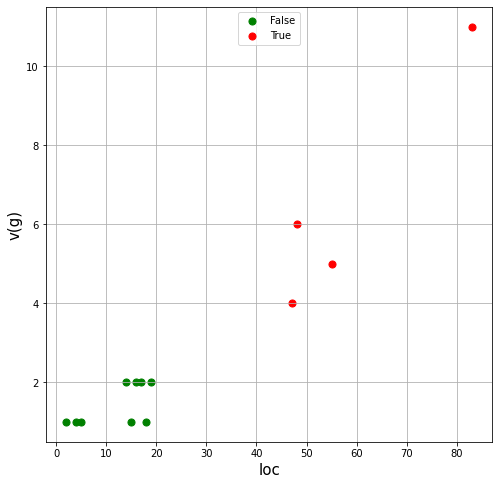

In [5]:
# i += 1
# print(i)
# data_sample = data[['loc','v(g)','class']].sample(10,random_state=59)
# data_sample = data.loc[[1013, 256, 6, 576, 773, 2104, 500, 131, 2100,211,1450]]
import matplotlib.pyplot as plt
principalDf = pd.DataFrame(data = data_sample, columns = ['loc', 'v(g)'])
finalDf = pd.concat([principalDf, data_sample[['class']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = plt.axes() 
ax.set_xlabel('loc', fontsize = 15)
ax.set_ylabel('v(g)', fontsize = 15)
# ax.set_zlabel('V3', fontsize = 15) 
# ax.set_title(i, fontsize = 20)
targets = [False, True]
colors = ['g', 'r','b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'loc'], finalDf.loc[indicesToKeep, 'v(g)'], c = color, s = 50)
ax.legend(targets,loc=9)
ax.grid()


OrderedDict([(True, 5)])
[[55.  5.  1.]
 [48.  6.  1.]
 [47.  4.  1.]
 [83. 11.  1.]]
[[1 2]
 [2 0]
 [1 0]
 [0 1]]
5
[6 4 6 5 6]
8
step  [[0.0075431 ]
 [0.31622431]
 [0.01332201]
 [0.87722121]
 [0.13752682]]
rows [3 2 3 2 3]
cols [0 0 0 1 0]
diffs [[-28.  -6.   0.]
 [  1.   2.   0.]
 [-28.  -6.   0.]
 [  8.   1.   0.]
 [-28.  -6.   0.]]
nn_data [[55.  5.  1.]
 [48.  6.  1.]
 [47.  4.  1.]
 [83. 11.  1.]]
nn_num [[1 2]
 [2 0]
 [1 0]
 [0 1]]
nn_num row cols  [0 1 0 0 0]
X row [[83. 11.  1.]
 [47.  4.  1.]
 [83. 11.  1.]
 [47.  4.  1.]
 [83. 11.  1.]]
[[82.78879333 10.95474143  1.        ]
 [47.31622431  4.63244862  1.        ]
 [82.62698366 10.92006793  1.        ]
 [54.01776966  4.87722121  1.        ]
 [79.14924905 10.17483908  1.        ]]
odict_items([(True, 5)])


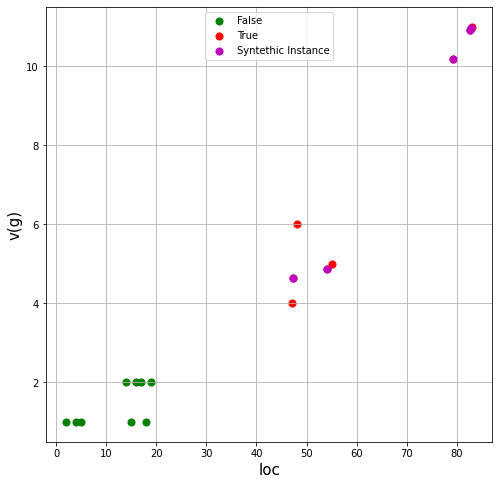

In [11]:
sm = SMOTE(random_state=9, sampling_strategy=1, k_neighbors=2)
X_train, y_train = sm.fit_sample(data_sample[['loc','v(g)','class']], data_sample['class'])

principalDf = pd.DataFrame(data = X_train, columns = ['loc', 'v(g)'])
finalDf = pd.concat([principalDf, X_train[['class']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = plt.axes() 
ax.set_xlabel('loc', fontsize = 15)
ax.set_ylabel('v(g)', fontsize = 15)
# ax.set_zlabel('V3', fontsize = 15) 
# ax.set_title(i, fontsize = 20)
targets = [False, True]
colors = ['g', 'r','b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'loc'], finalDf.loc[indicesToKeep, 'v(g)'], c = color, s = 50)

targets = [False, True, "Syntethic Instance"]
ax.scatter(X_train[X_train.index >= len(data_sample)]['loc'], X_train[X_train.index >= len(data_sample)]['v(g)'], c = 'm', s = 50)
ax.legend(targets,loc=9)
ax.grid()


In [12]:
import numpy as np

#Dibawah ini merupakan terdekat
test = np.array([[1 ,2],
 [2 ,0],
 [1 ,0],
 [0 ,1]])

rows = np.array([3 ,2, 3, 2, 3]) #baris
cols = np.array([0 ,0, 0, 1 ,0]) #index pilihan tetangga terdekat

test[1,1]

0

In [13]:
data_sample[['loc','v(g)','class']] 

,loc,v(g),class
1013,2.0,1.0,False
256,55.0,5.0,True
6,48.0,6.0,True
576,15.0,1.0,False
773,5.0,1.0,False
2104,19.0,2.0,False
500,17.0,2.0,False
131,47.0,4.0,True
2100,14.0,2.0,False
1451,4.0,1.0,False


In [14]:
X_train[X_train.index >= len(data_sample)]

,loc,v(g),class
13,82.788793,10.954741,True
14,47.316224,4.632449,True
15,82.626984,10.920068,True
16,54.017770,4.877221,True
17,79.149249,10.174839,True
